# EDA for insurance claim prediction

### Problem Statement

**Analyze the given customer data from an insurance company and Predict whether to sanction insurance or not.**

### Analysis of Problem Statement

We have to predict a yes/no kind of output.

Sanction Insurance - Yes

Sanction Insurance - No

Hence, this is a classification problem.

### Potential Business Problems

1. Reduce potential defaulting customers from the given dataset.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# For some Statistics
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer

# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

In [2]:
# Creating path variable to read data
raw_data_path = os.path.abspath(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(),os.path.pardir),'data'),'raw'),'train.csv'))
root_path = os.path.abspath(os.path.join(os.path.join(os.getcwd(),os.path.pardir),os.path.pardir))

In [3]:
# Creating path variable to read data
raw_data_path_test = os.path.abspath(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(),os.path.pardir),'data'),'raw'),'test.csv'))

In [4]:
df_test = pd.read_csv(raw_data_path_test)

In [5]:
sys.path.append(root_path)

In [6]:
from insurance_risk_analysis.eda import get_class_counts, normality_plots

In [7]:
# Read training data
df = pd.read_csv(raw_data_path)

## Dataset information:

There are 10 predictor features and 1 Target feature (Claim Status).

Target: Claim Status (Claim.Status)
Name of agency (Agency)
Type of travel insurance agencies (Agency.Type)
Distribution channel of travel insurance agencies (Distribution.Channel)
Name of the travel insurance products (Product.Name)
Duration of travel (Duration)
Destination of travel (Destination)
Amount of sales of travel insurance policies (Net.Sales)
The commission received for travel insurance agency (Commission)
Gender of insured (Gender)
Age of insured (Age)

In [8]:
# having a peek into data
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [9]:
# getting info about training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 12 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null object
Distribution Channel    50660 non-null object
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null int64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [10]:
# checking is there any null values in the dataframe
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  36046
Age                         0
dtype: int64

**Insights**
1. There are null values in Gender column

In [11]:
df['Agency Type'].value_counts()

Travel Agency    36672
Airlines         13988
Name: Agency Type, dtype: int64

### Observations:
36,672 customers prefer to travel with Travel Agency

13,988 (Approx. 14k) customers prefer to travel with Airlines

In [12]:
df['Distribution Channel'].value_counts()

Online     49770
Offline      890
Name: Distribution Channel, dtype: int64

**Observation**
Distribution of Travel Insurance is majorly via Online. 49770 customers have submitted claims Online

Only 890 customers have submitted claims offline/personal visit.

In [13]:
print("Count of Rejection Claims - {}".format(df[df['Claim'] ==0].count()[0]))
pd.DataFrame(df.groupby(['Agency Type'])['Claim'].value_counts())

Count of Rejection Claims - 49918


Claim
Agency Type   Claim       
Airlines      0      13514
              1        474
Travel Agency 0      36404
              1        268

In [14]:
pd.DataFrame(df['Agency Type'].value_counts())

,Agency Type
Travel Agency,36672
Airlines,13988


***Airlines has the highest number of Approved Claims 474 out of 13988 claim applications***

***Travel Agency has low number of Approved Claims 268 out of 36672 claim applications to Travel Agency***

***
## Productwise Claim rejections
***

In [15]:

print("Count of Rejection Claims - {}".format(df[df['Claim'] ==0].count()[0]))
pd.DataFrame(df.groupby(['Product Name'])['Claim'].value_counts())

Count of Rejection Claims - 49918


Claim
Product Name                         Claim       
1 way Comprehensive Plan             0       2647
                                     1          8
2 way Comprehensive Plan             0      10389
                                     1        112
24 Protect                           0        199
Annual Gold Plan                     0        131
                                     1         17
Annual Silver Plan                   0       1028
                                     1        128
Annual Travel Protect Gold           0         71
                                     1         10
Annual Travel Protect Platinum       0         44
                                     1          1
Annual Travel Protect Silver         0         69
                                     1          4
Basic Plan                           0       4364
                                     1         19
Bronze Plan                          0       3084
                                     1        162
Cancellation Plan                    0      14893
                                     1         33
Child Comprehensive Plan             0          7
Comprehensive Plan                   0        288
                                     1          5
Gold Plan                            0        278
                                     1         14
Individual Comprehensive Plan        0         55
                                     1          3
Premier Plan                         0        156
                                     1          3
Rental Vehicle Excess Insurance      0       6784
                                     1         68
Silver Plan                          0       1671
                                     1        118
Single Trip Travel Protect Gold      0        152
                                     1          7
Single Trip Travel Protect Platinum  0         54
                                     1          5
Single Trip Travel Protect Silver    0        132
                                     1          2
Spouse or Parents Comprehensive Plan 0         11
                                     1          1
Ticket Protector                     0        834
                                     1          5
Travel Cruise Protect                0        419
                                     1          2
Travel Cruise Protect Family         0          1
Value Plan                           0       2157
                                     1         15

In [16]:
# finding % of nulls in gender column
nans = lambda df: df[df.isnull().any(axis=1)]
nan_percent = (len(nans(df))/len(df))*100
print(nan_percent,'% of data have NaN as Gender')

71.15278326095539 % of data have NaN as Gender


In [17]:
# Function to display all % of nulls in each group
def group_by_null(df, group_col, null_col):
    df2 = df[null_col].isnull().groupby([df[group_col]]).sum().astype(int).reset_index(name='count')
    df3 = pd.merge(df2,df[group_col].groupby([df[group_col]]).count().reset_index(name='total_count'),on=group_col)
    df3['null_%'] = (df3['count']/df3['total_count'])*100
    df4 = pd.DataFrame(df[df[null_col]=='F'].groupby([group_col])['ID'].count())
    df3 = pd.merge(df3,df4,on=group_col)
    df3.rename(columns={'ID':'Female_count'}, inplace=True)
    df4 = pd.DataFrame(df[df[null_col]=='M'].groupby([group_col])['ID'].count())
    df3 = pd.merge(df3,df4,on=group_col)
    df3.rename(columns={'ID':'Male_count'}, inplace=True)
    return df3
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [18]:
df.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50660.000000,50660.000000,50660.000000,50660.000000,50660.000000,50660.000000
mean,31674.458014,0.014647,49.413383,40.837350,9.834257,40.008231
std,18289.180100,0.120135,101.354774,48.884947,19.904720,14.074357
min,0.000000,0.000000,-2.000000,-389.000000,0.000000,0.000000
25%,15883.750000,0.000000,9.000000,18.000000,0.000000,35.000000
50%,31646.500000,0.000000,22.000000,27.000000,0.000000,36.000000
75%,47543.250000,0.000000,53.000000,48.500000,11.550000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.500000,118.000000


### Observation:
     Duration has negative value as minimum value which doesnt look correct. So this is a possible outlier.
     Age has zero value. So this is a possible outlier.

In [19]:
len(df[df['Duration'] < 0])/len(df)*100

0.005921831819976313

### Number of records with Duration less than 0 is 3 which is 0.006 percent approx. Hence, these records can be removed

In [20]:
# finding no of nulls in each agency
group_by_null(df,'Agency','Gender')

,Agency,count,total_count,null_%,Female_count,Male_count
0,ADM,37,63,58.730159,13,13
1,ART,5,272,1.838235,81,186
2,C2B,0,6631,0.000000,3651,2980
3,CBH,0,81,0.000000,57,24
4,CCR,1,158,0.632911,116,41
5,CSR,0,68,0.000000,48,20
6,CWT,6847,6852,99.927029,3,2
7,JWT,15,606,2.475248,197,394
8,JZI,47,5069,0.927205,2051,2971
9,KML,0,318,0.000000,161,157


In [21]:
# finding female and male count in each group of agency, agency type, destination
df1 = pd.DataFrame(df[df['Gender']=='F'].groupby(['Agency','Agency Type','Destination'])['ID'].count())
df1.rename(columns={'ID':'Female_count'}, inplace=True)
df2 = pd.DataFrame(df[df['Gender']=='M'].groupby(['Agency','Agency Type','Destination'])['ID'].count())
df2.rename(columns={'ID':'Male_count'}, inplace=True)
df3 = pd.merge(df1,df2,on=['Agency','Agency Type','Destination'])
df3

Female_count  Male_count
Agency Agency Type   Destination                                        
ADM    Travel Agency FRANCE                                9           9
                     NETHERLANDS                           2           2
ART    Airlines      CAMBODIA                              4           7
                     CHINA                                10          13
                     HONG KONG                             5          11
                     INDONESIA                             3           3
                     IRAN, ISLAMIC REPUBLIC OF             1           1
                     MALAYSIA                             10          21
                     MYANMAR                               1           4
                     PHILIPPINES                          28          56
                     SINGAPORE                             7          11
                     THAILAND                              5          28
                     UNITED ARAB EMIRATES                  3          14
                     UNITED KINGDOM                        1           1
                     VIET NAM                              2           7
C2B    Airlines      SINGAPORE                          3651        2980
CBH    Travel Agency MALAYSIA                             26          12
                     THAILAND                             30          12
CCR    Travel Agency MALAYSIA                             44          20
                     THAILAND                             71          21
CSR    Travel Agency MALAYSIA                             28           9
                     SPAIN                                 1           1
                     THAILAND                             18          10
JWT    Airlines      INDIA                               197         394
JZI    Airlines      AUSTRALIA                            77          86
                     AUSTRIA                               2           2
                     BRUNEI DARUSSALAM                     1           6
                     CAMBODIA                              4          35
                     CANADA                                7           9
                     CHINA                               289         631
...                                                      ...         ...
LWC    Travel Agency CHINA                                31          36
                     FRANCE                                5           3
                     GERMANY                               1           1
                     HONG KONG                            15           2
                     INDIA                                 7           1
                     INDONESIA                            12          14
                     ITALY                                 2           1
                     JAPAN                                15          10
                     MALAYSIA                             16          17
                     NEPAL                                 1           1
                     NEW ZEALAND                           2           4
                     PHILIPPINES                           9           8
                     POLAND                                1           1
                     SOUTH AFRICA                          1           1
                     SPAIN                                 1           2
                     SRI LANKA                             9           2
                     SWITZERLAND                           2           1
                     TAIWAN, PROVINCE OF CHINA            14          10
                     THAILAND                             19          19
                     UNITED ARAB EMIRATES                  2           1
                     UNITED KINGDOM                       14           6
                     UNITED STATES                        84          79
                     VIET NAM    

In [22]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  36046
Age                         0
dtype: int64

In [23]:
# no of unique values in each column
df.nunique()

ID                      50660
Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               26
Claim                       2
Duration                  444
Destination               144
Net Sales                1053
Commision (in value)      968
Gender                      2
Age                        88
dtype: int64

**Insights**
1. Agency type, distribution channel, claim, Gender have only 2 unique values. So label encoding for these values can be enough
2. Agency and product name have 16 and 26 unique values, so one hot encoding may be done

In [24]:
# Label encoding for Agency type, distribution channel, claim, Gender 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 


In [25]:
df['Agency Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [26]:
# Encode labels in column 'species'. 
df_test['Agency Type']= label_encoder.fit_transform(df_test['Agency Type']) 
df_test['Agency Type'].unique()
df['Agency Type']= label_encoder.fit_transform(df['Agency Type']) 
df['Agency Type'].unique()

array([1, 0], dtype=int64)

In [27]:
df['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [28]:

# Encode labels in column 'species'. 
df_test['Distribution Channel']= label_encoder.fit_transform(df_test['Distribution Channel']) 
df_test['Distribution Channel'].unique()
df['Distribution Channel']= label_encoder.fit_transform(df['Distribution Channel']) 
df['Distribution Channel'].unique()

array([1, 0], dtype=int64)

In [29]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,1,1,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,1,1,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,1,1,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,1,1,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,1,1,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [30]:
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

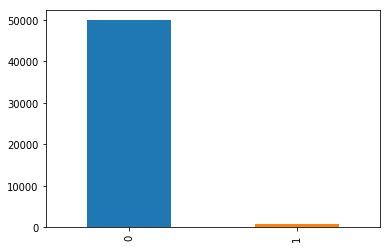

In [31]:
df['Claim'].value_counts().plot(kind='bar')

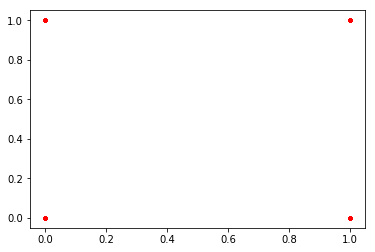

In [32]:
plt.plot(df['Distribution Channel'], df['Claim'], 'r.')
plt.show()

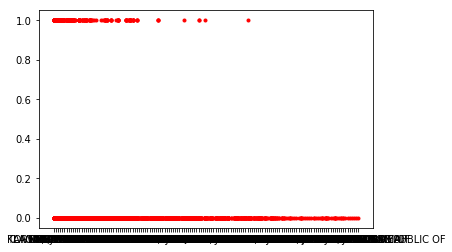

In [33]:
plt.plot(df['Destination'], df['Claim'], 'r.')
plt.show()

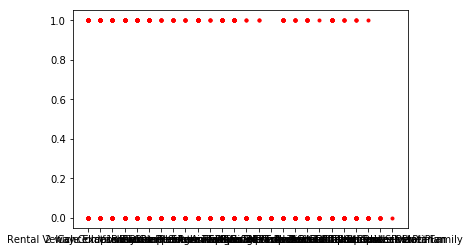

In [34]:
plt.plot(df['Product Name'], df['Claim'], 'r.')
plt.show()

In [35]:
# Multi colinearity detection
def plot_heatmap(df, fig_size=(10, 7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot=True)
    plt.title('Heatmap for detecting multicollinearity', fontsize=16, color='navy')
    plt.show()

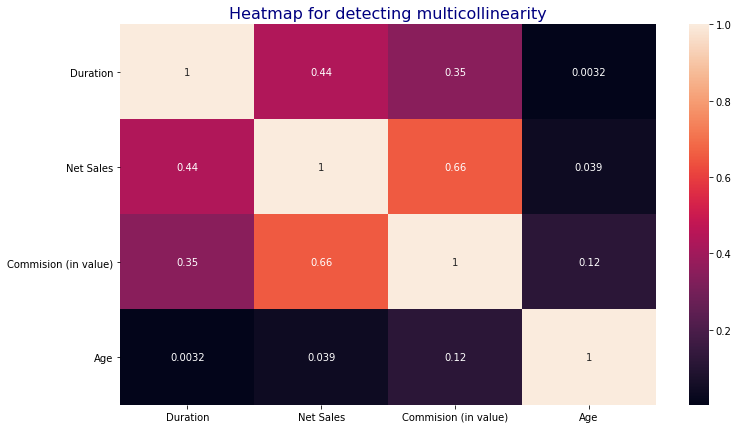

In [36]:
plot_heatmap(df[['Duration','Net Sales','Commision (in value)','Age']], fig_size=(12,7))

In [37]:
def scatter_target(df, ind_vars, target):
    for c in ind_vars:
        fig = plt.figure(figsize=(10, 5))
        sns.regplot(df[c], df[target], line_kws={'color':'midnightblue'}, color='lightsteelblue')
        plt.title('Scatterplot of '+ c + ' vs ' + target, color='navy', fontsize=16)
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


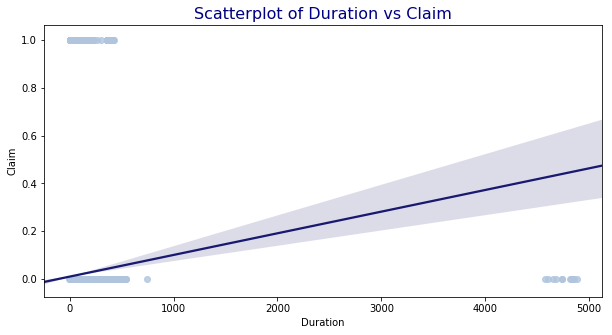

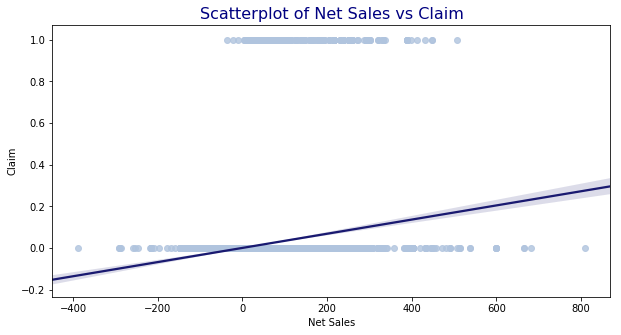

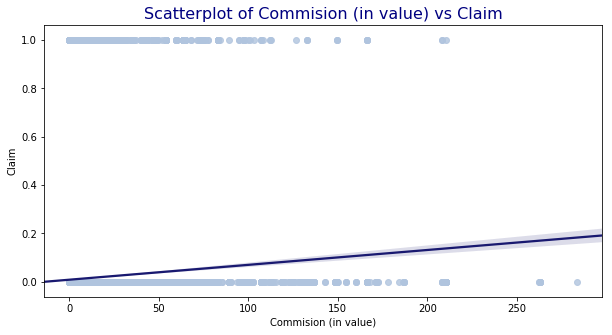

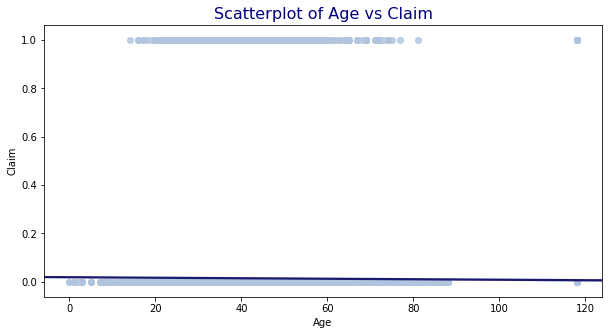

In [38]:
scatter_target(df=df, ind_vars=['Duration','Net Sales','Commision (in value)','Age'], target='Claim')

In [39]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [40]:
#Function to plot scatter plot for all combination columns
def df_scatter(df,target):
    fig, axs = plt.subplots(len(df.columns),1, figsize=(8, len(df.columns)*8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    print(axs)
    for i,j in zip(df.columns,range(len(df.columns))):
        axs[j].scatter(x=df[i],y=df[target])
        axs[j].set_title('col: '+str(i)+'vs col: '+str(target))
        axs[j].set_xlabel(str(i))
        axs[j].set_ylabel(str(target))  
    plt.show()
#Function to find outlier % in a column
def outlier_percentage(df1,col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    iqr_val = Q3 - Q1
    outliers =  (df1[(df1[col]<Q1-1.5*iqr_val) | (df1[col]>Q3+1.5*iqr_val)])
    return (outliers[col].count()/(df1[col].count()))*100
#Function to plot every column's boxplot
def df_boxplot(df):
    fig, axs = plt.subplots(len(df.columns),1, figsize=(8, len(df.columns)*8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i,j in zip(df.columns,range(len(df.columns))):
        axs[j].boxplot(df[i])
        axs[j].set_title('col: '+str(i)+'    outliers %: '+str(outlier_percentage(df,i)))
    plt.show()
#Function to find column type
def identify_col_type(df, col, threshold = 0.01):
    # Need to check for datetime
    if df[col].dtype!='object':
        if df[col].nunique()==2:
            return 'binary'
        if (df[col].nunique()/len(df[col])) < threshold:
            return 'categorical'
        else:
            return 'numerical'
    return 'categorical'

#Function to find out min, max, and mean of a column
def get_basic_measures(df1):
    basic_info = {}
    basic_info['col']=[]
    basic_info['min']=[]
    basic_info['max']=[]
    basic_info['mean']=[]
    for i in df1.columns:
        min_val = df1[i].min()
        max_val = df1[i].max()
        mean_val = df1[i].mean()
        basic_info['col'].append(i)
        basic_info['min'].append(min_val)
        basic_info['max'].append(max_val)
        basic_info['mean'].append(mean_val)
    return pd.DataFrame(basic_info)
def display_cat2cat(df, col1, col2):
    plt.figure(figsize=(15,8))
    crosstab = pd.crosstab(index=df[col2], columns=df[col1])
    crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
    plt.xticks(rotation = 90)
    plt.show()
    
    
def display_cat2num(df, col1, col2):
    plt.figure(figsize=(15,15))
    plt.xticks(rotation = 45)
    sns.boxplot(col1, col2, data=df)
    plt.show()
    
def display_num2num(df, col1, col2):
    sns.lmplot(col1, col2, data=df, fit_reg=True)
    plt.show()
    
def cat_countplot(df, col1):
    sns.countplot(y=col1, data=df)
    plt.show()
    

In [41]:
X = df.drop([ 'Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

ID is NOT an important predictor. (Discard ID from model)
Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Net Sales is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age is IMPORTANT for Prediction


In [42]:
# Function to plot histogram of all columns
def df_hist(df):
    fig, axs = plt.subplots(len(df.columns),1, figsize=(8, len(df.columns)*8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i,j in zip(df.columns,range(len(df.columns))):
        axs[j].hist(df[i])
        axs[j].set_title('col: '+str(i)+'    outliers %: '+str(outlier_percentage(df,i)))
    plt.show()
    

In [43]:
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

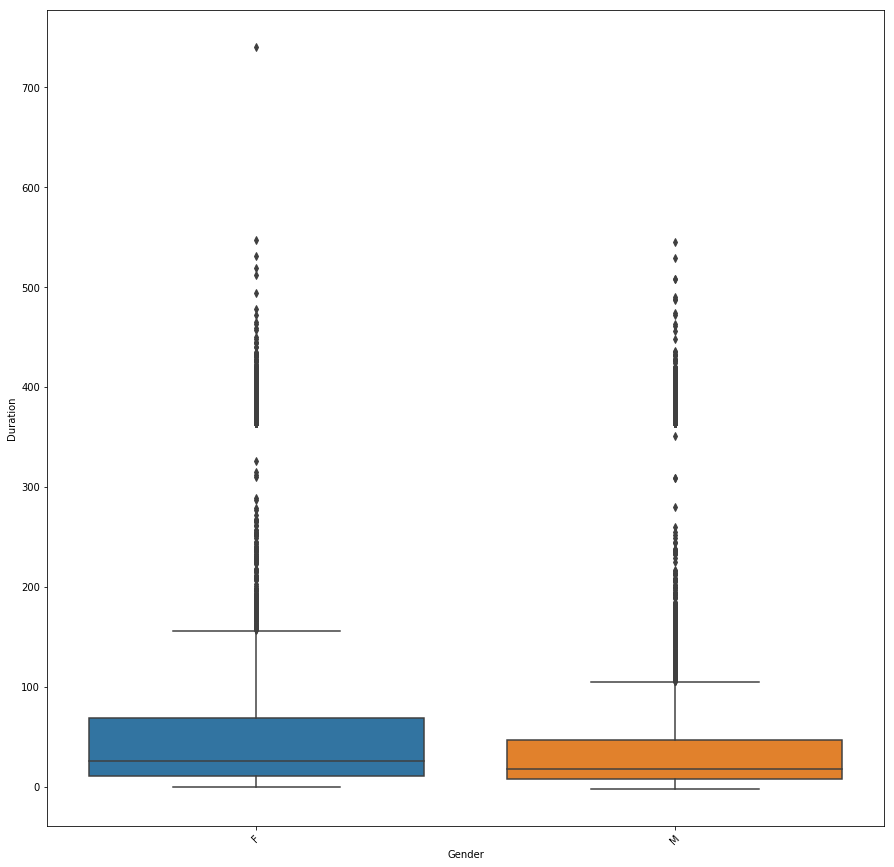

In [44]:
#Gender v/s Other Features

#Gender v/s Duration
display_cat2num(df, 'Gender', 'Duration')


<Figure size 1080x576 with 0 Axes>

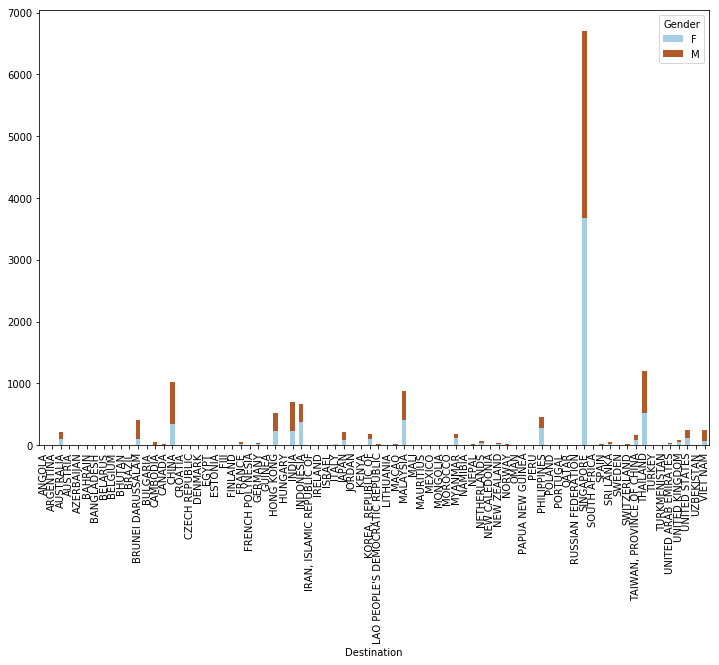

In [45]:
#Gender v/s Destination
display_cat2cat(df,'Gender','Destination')

<Figure size 1080x576 with 0 Axes>

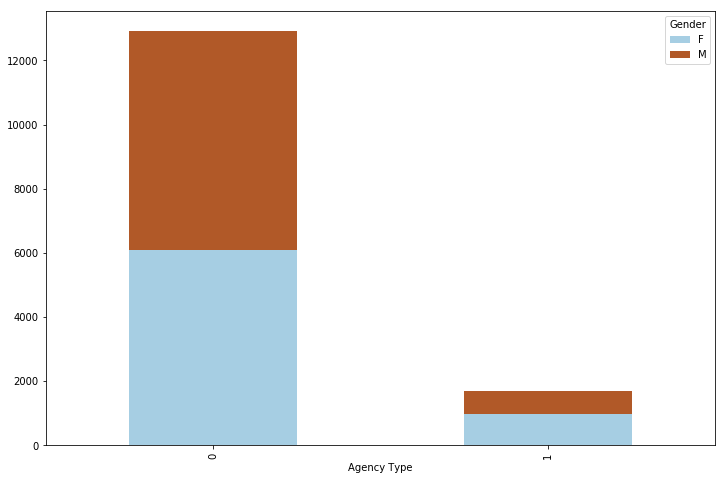

In [46]:

#Gender v/s Agency Type
display_cat2cat(df,'Gender','Agency Type')


<Figure size 1080x576 with 0 Axes>

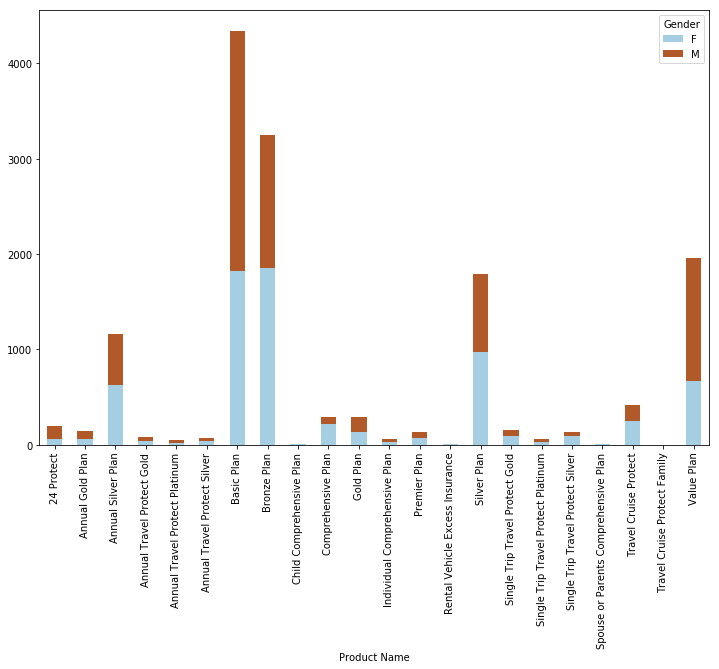

In [47]:

#Gender v/s Product
display_cat2cat(df,'Gender','Product Name')


<Figure size 1080x576 with 0 Axes>

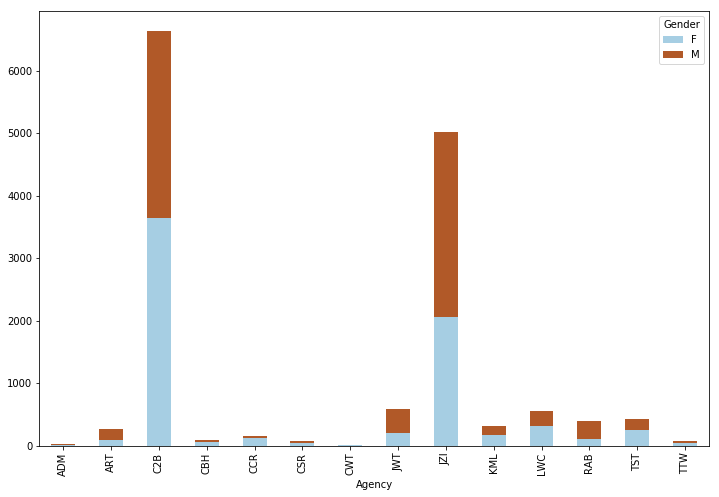

In [48]:

#Gender v/s Product
display_cat2cat(df,'Gender','Agency')


<Figure size 1080x576 with 0 Axes>

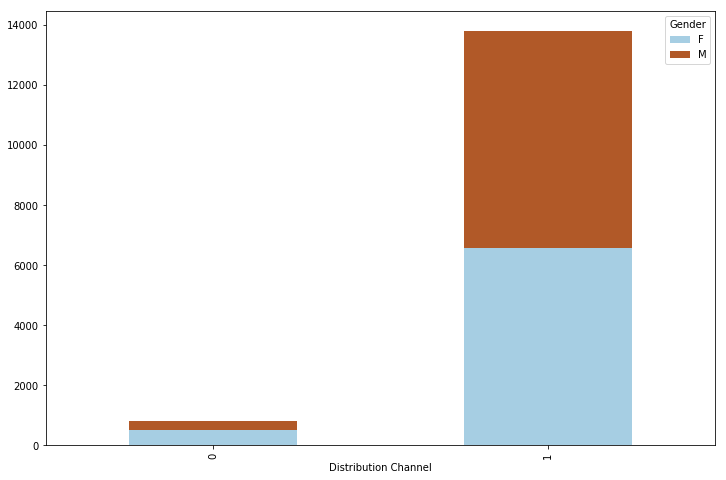

In [49]:

#Gender v/s Product
display_cat2cat(df,'Gender','Distribution Channel')


<Figure size 1080x576 with 0 Axes>

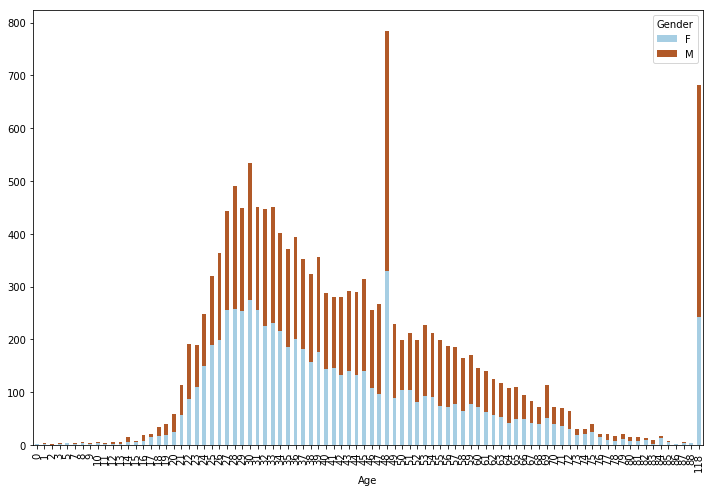

In [50]:

#Gender v/s Product
display_cat2cat(df,'Gender','Age')


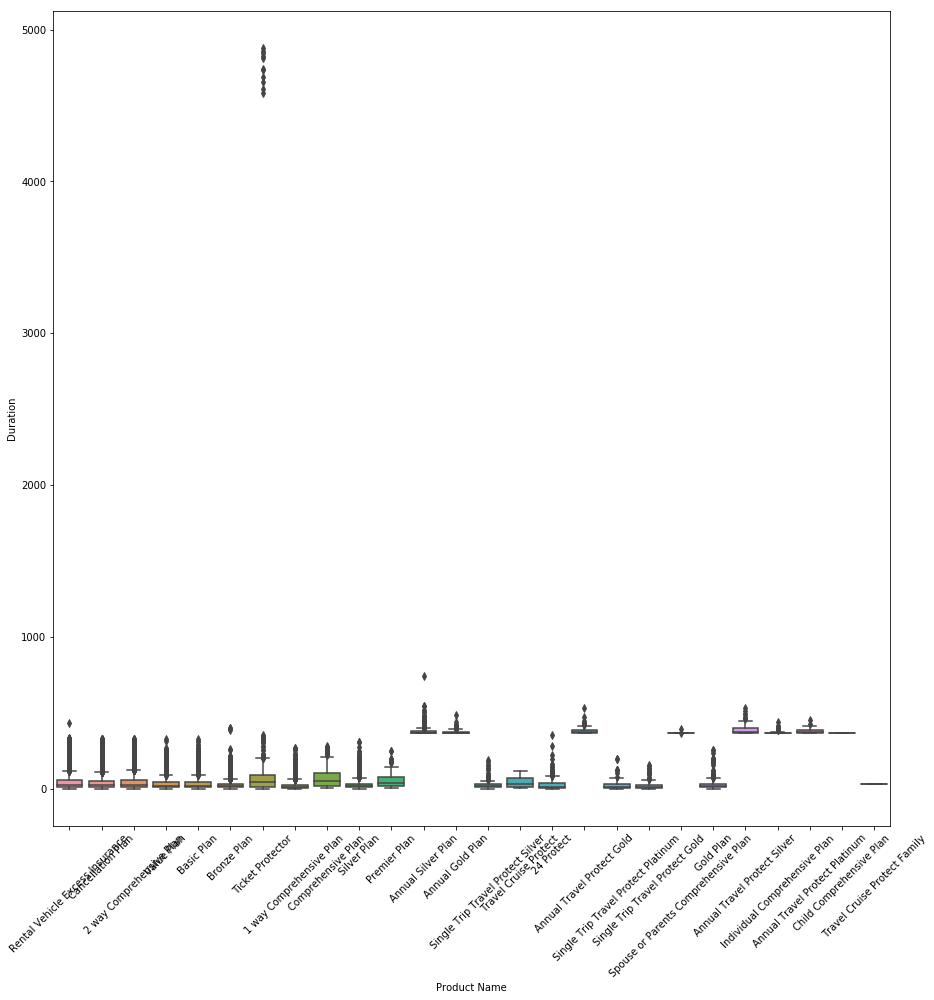

In [51]:

#Product v/s Duration
display_cat2num(df,'Product Name','Duration')


<Figure size 1080x576 with 0 Axes>

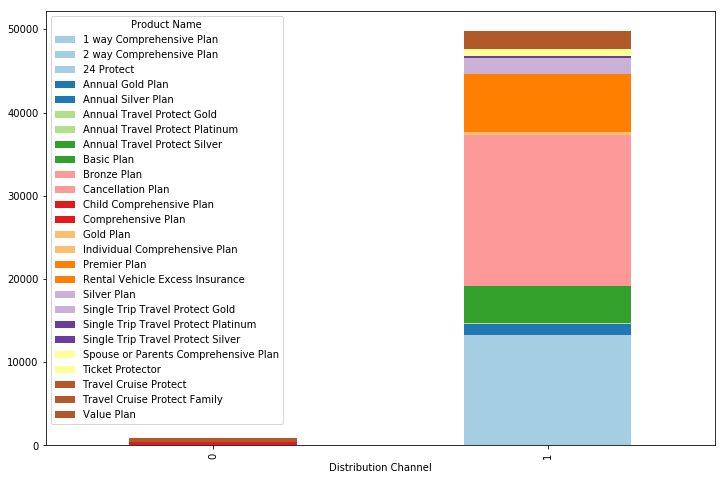

In [52]:

#Product v/s Dist CHannel
display_cat2cat(df,'Product Name','Distribution Channel')

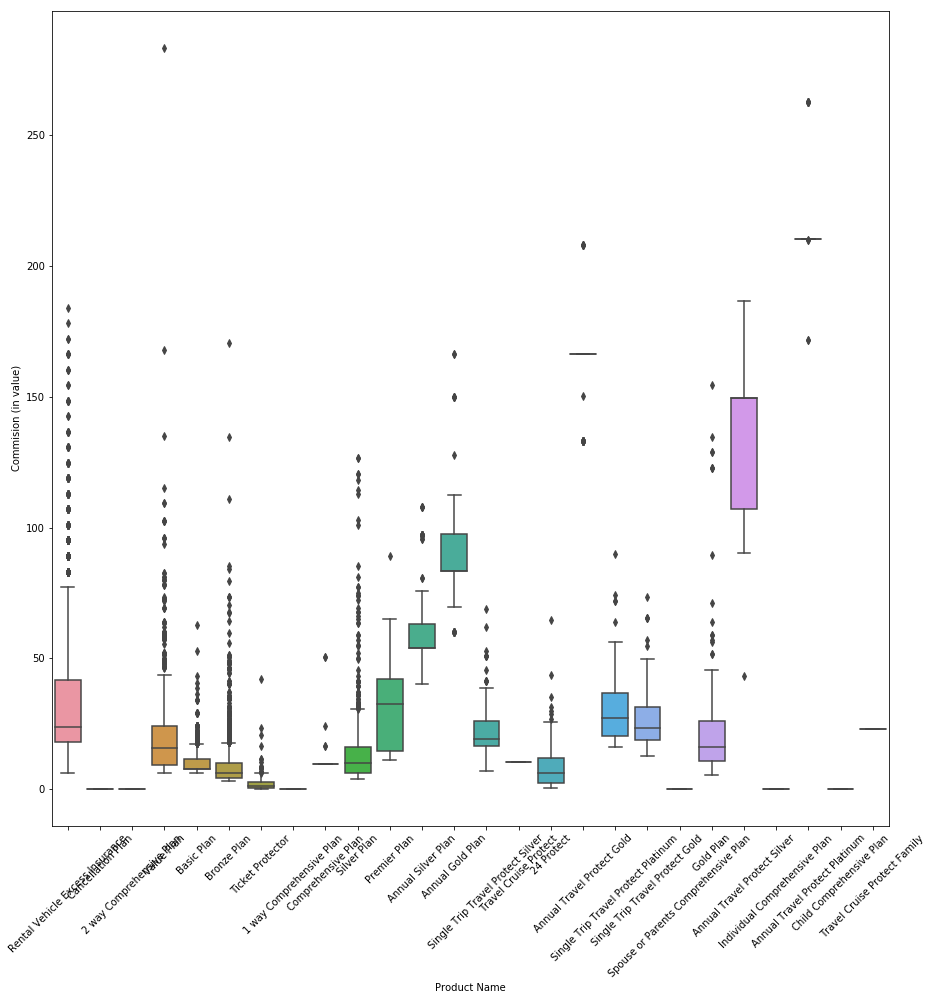

In [53]:

#Product v/s Commission
display_cat2num(df,'Product Name','Commision (in value)')

<Figure size 1080x576 with 0 Axes>

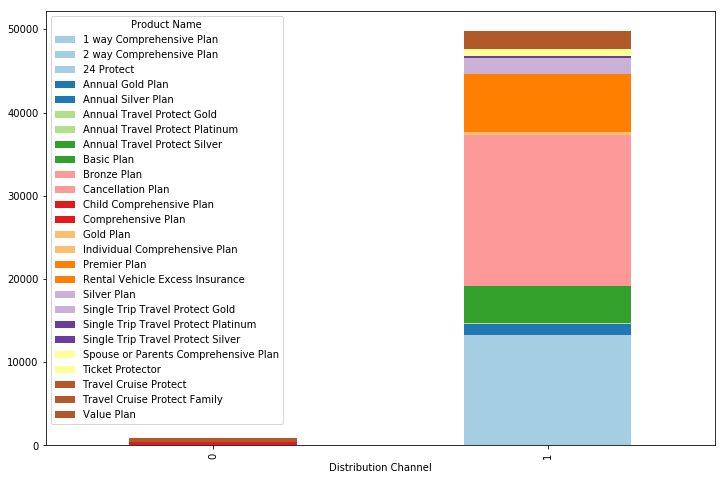

In [54]:

#Product v/s Dist Channel
display_cat2cat(df,'Product Name','Distribution Channel')

<Figure size 1080x576 with 0 Axes>

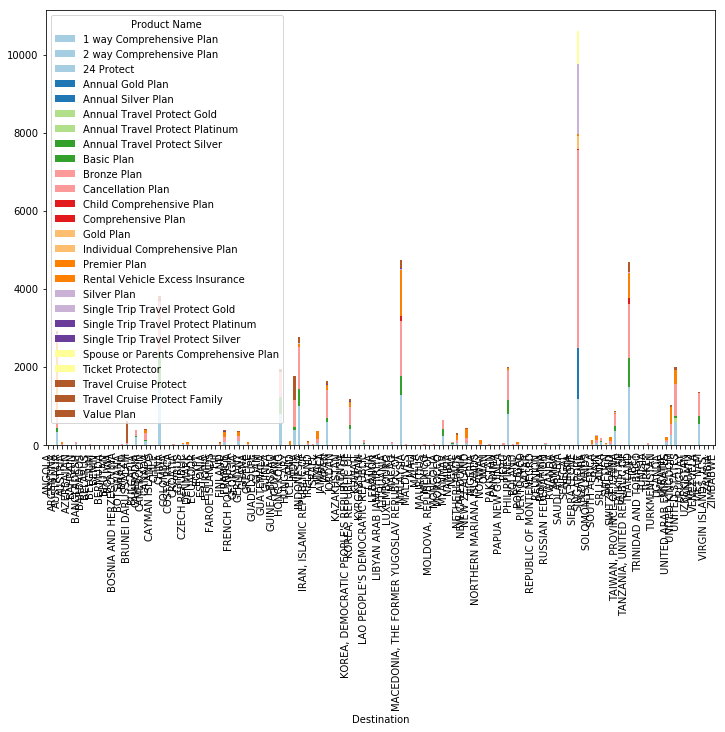

In [55]:

#Product v/s Destination
display_cat2cat(df,'Product Name','Destination')

<Figure size 1080x576 with 0 Axes>

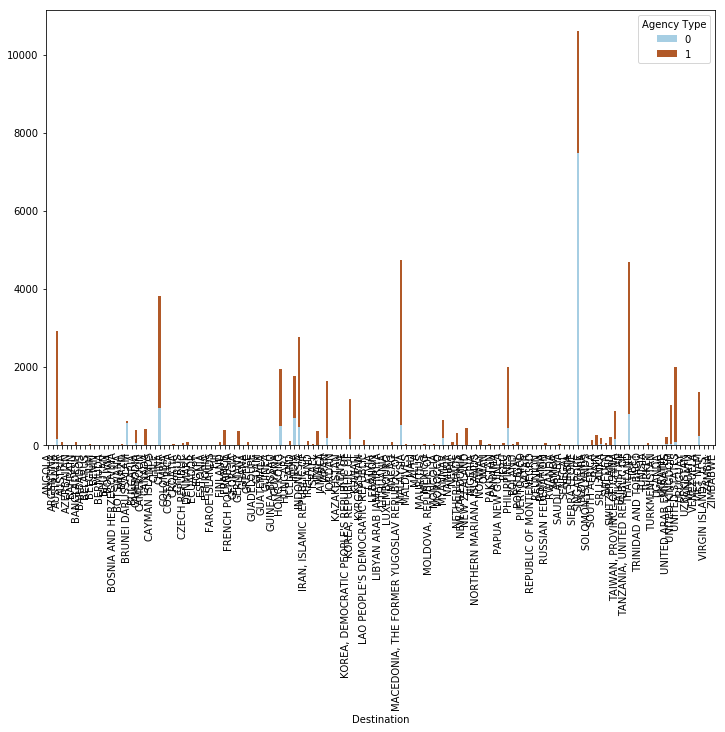

In [56]:

#Agency Type v/s Destination
display_cat2cat(df,'Agency Type','Destination')

<Figure size 1080x576 with 0 Axes>

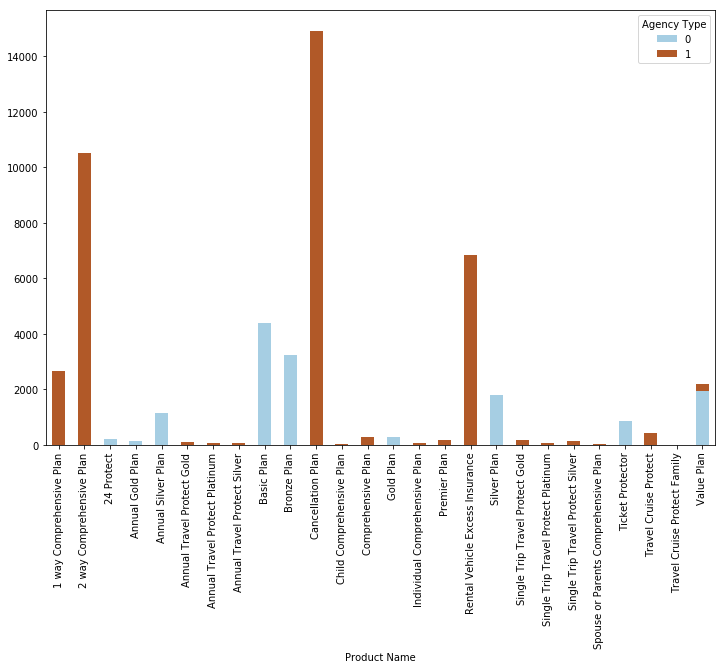

In [57]:

#Agency Type v/s Product Name
display_cat2cat(df,'Agency Type','Product Name')

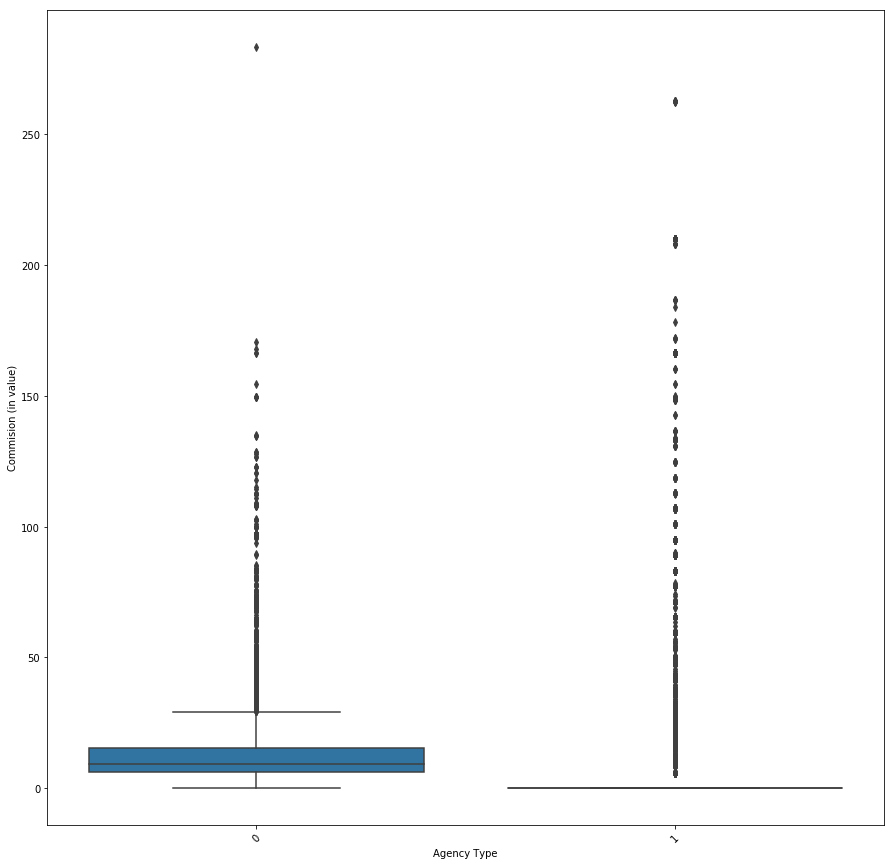

In [58]:

#Agency Type v/s Commision 
display_cat2num(df,'Agency Type','Commision (in value)')

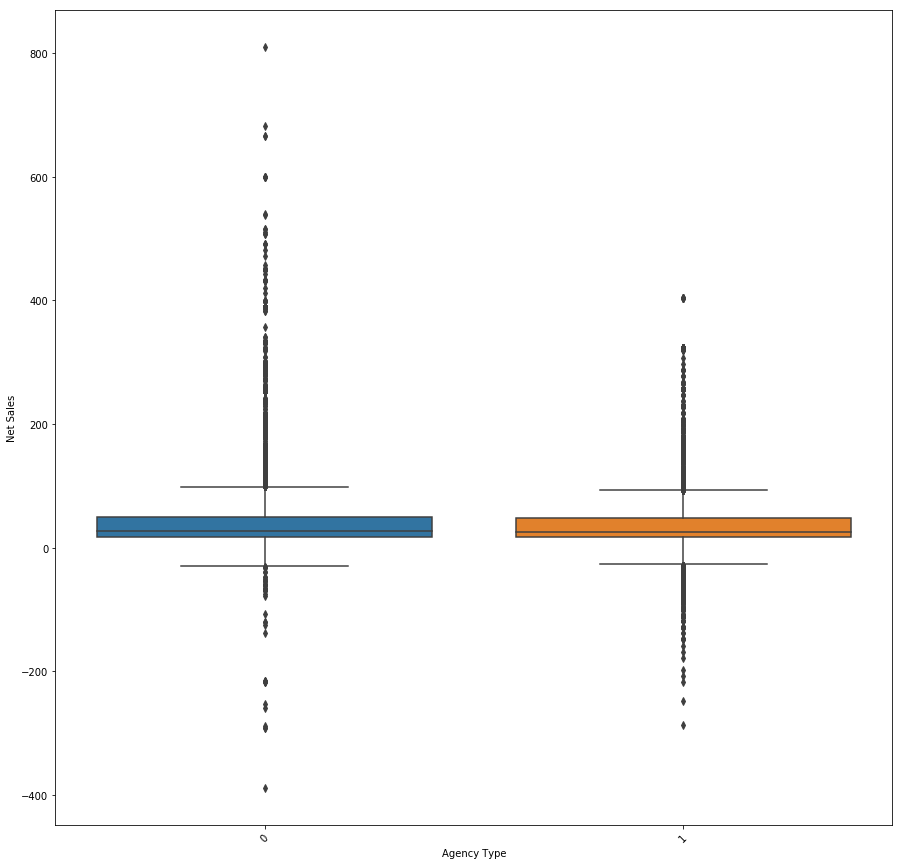

In [59]:
#Agency Type v/s Commision 
display_cat2num(df,'Agency Type','Net Sales')

**Insights**
1. Duration have outliers
2. Net sales have outliers
3. Commission have outliers
4. Age has outliers

In [60]:
# Treating outliers in duration column
df[df['Duration']<0]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
4072,52588,JZI,0,1,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,NaN,118
39019,56668,JZI,0,1,Basic Plan,0,-1,INDONESIA,18.0,6.3,NaN,118
48468,14943,JZI,0,1,Basic Plan,0,-2,BANGLADESH,22.0,7.7,M,118


In [61]:
# replacing negative duration by median
df_test["Duration"] = np.where(df_test["Duration"] <0, df_test.Duration.median(),df_test['Duration'])

df["Duration"] = np.where(df["Duration"] <0, df.Duration.median(),df['Duration'])

In [62]:
# Treating outliers in Age column
df[df['Age']==0].Age.count()

2

In [63]:
df1 = df[df['Age']!=0]
df1 = df1[df1['Age']<=100]
median_val= df1.Age.median()
df2 = df_test[df_test['Age']!=0]
df2 = df2[df2['Age']<=100]
median_val_1= df2.Age.median()

In [64]:
# replacing age == 0 by median
df_test["Age"] = np.where(df_test["Age"] ==0, median_val_1,df_test['Age'])
df["Age"] = np.where(df["Age"] ==0, median_val,df['Age'])

In [65]:
df[df['Age']>=100].Age.count()

797

In [66]:
# replacing values >100 duration by median
df_test["Age"] = np.where(df_test["Age"] >100, median_val_1,df_test['Age'])

df["Age"] = np.where(df["Age"] >100, median_val,df['Age'])

In [67]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,1,1,Rental Vehicle Excess Insurance,0,7.0,MALAYSIA,0.0,17.82,NaN,31.0
1,4339,EPX,1,1,Cancellation Plan,0,85.0,SINGAPORE,69.0,0.00,NaN,36.0
2,34590,CWT,1,1,Rental Vehicle Excess Insurance,0,11.0,MALAYSIA,19.8,11.88,NaN,75.0
3,55816,EPX,1,1,2 way Comprehensive Plan,0,16.0,INDONESIA,20.0,0.00,NaN,32.0
4,13816,EPX,1,1,Cancellation Plan,0,10.0,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


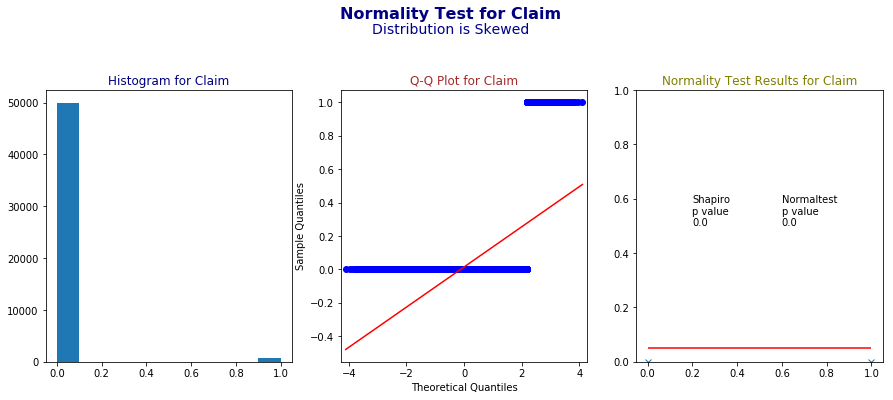

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


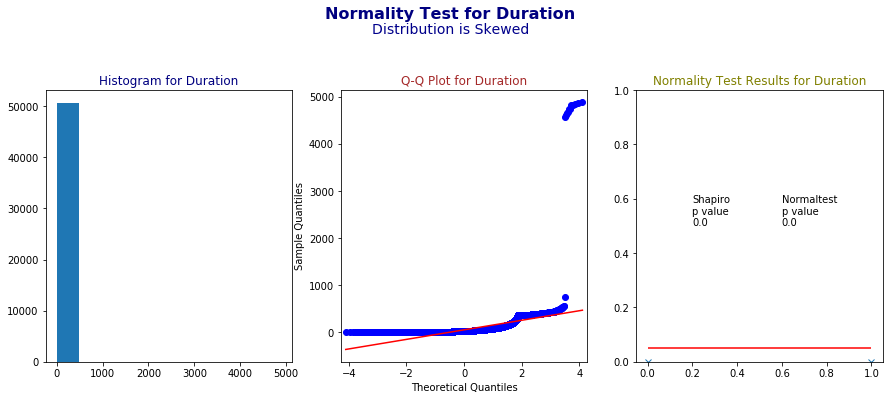

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


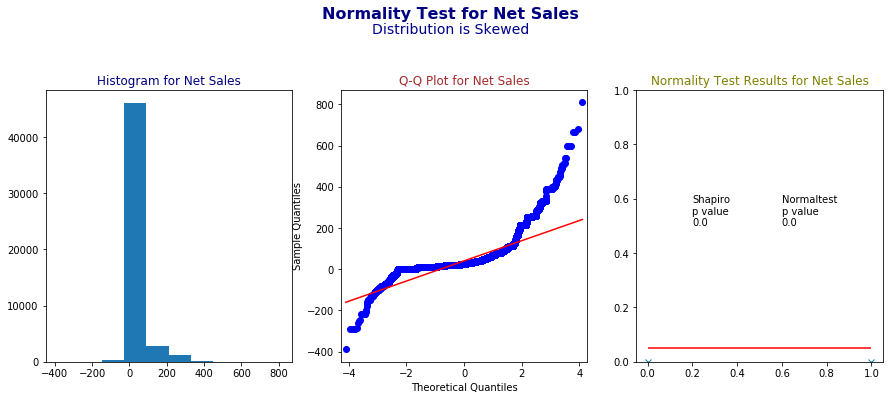

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


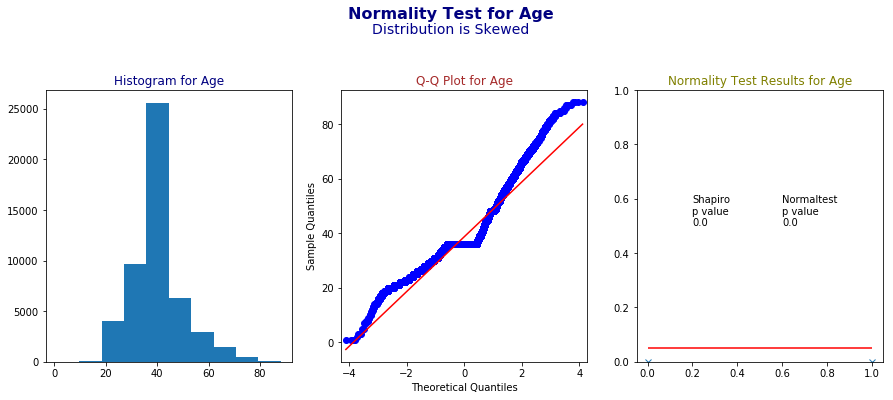

In [68]:
cols = ['Claim','Duration','Net Sales','Age']
for c in cols:
    normality_plots(df,c)

**Insights**
1. None of the variables in the given data set follow the normal distribution

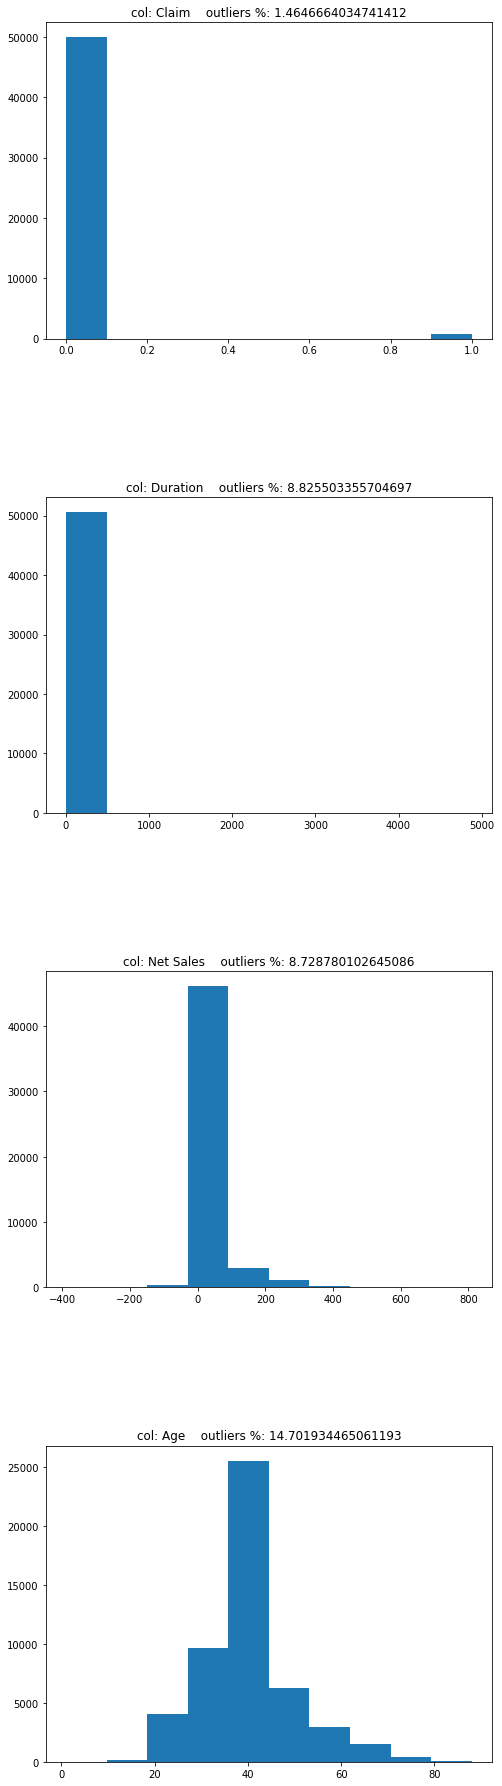

In [69]:
df1 =  df[['Claim','Duration','Net Sales','Age']]
df_hist(df1)

**Insights**
1. Agency type is highly imbalanced
2. Distribution channel is highly imbalanced
3. Claim is highly imbalanced
4. agency_>10000 is slightly imbalanced
5. agency_between 10000 and 5000 is imbalanced
6. agency_less_than 1000 is highly imbalanced
7. product_between 10000 and 5000 is highly imbalanced
8. prcduct_between 5000 and 1000 is imbalanced
9. product_less_than 100 is highly imbalanced
10. country>10000 is highly imbalanced
11. country between 10000 and 5000 is imbalanced
12. country less than 1000 is imbalanced

In [70]:
df1 =  df[['Claim','Duration','Net Sales','Age']]
get_basic_measures(df1)

,col,min,max,mean
0,Claim,0.0,1.0,0.014647
1,Duration,0.0,4881.0,49.414765
2,Net Sales,-389.0,810.0,40.837350
3,Age,1.0,88.0,38.719601


In [71]:
df1 =  df[['Claim','Duration','Net Sales','Age']]
for col in df1.columns:
    print(col,' has ',outlier_percentage(df1,col),' % of outliers')

Claim  has  1.4646664034741412  % of outliers
Duration  has  8.825503355704697  % of outliers
Net Sales  has  8.728780102645086  % of outliers
Age  has  14.701934465061193  % of outliers


**Insights**
1. Claim column has 1.5% outliers. but min is 0, max is 1 so we can neglect that
2. Distribution Channel has 1.7% of outliers. but min is 0, max is 1 so we can neglect that
3. Duration has 8.8% of outliers. min is -2 max is 4881 - possible outliers
4. Net Sales has 8.7% of outliers. -389 is min, 810.0 is max
5. Age has 9.29% of utliers, 0 is min and 118.0	- possible outliers


In [72]:
cols = ['Duration','Net Sales','Commision (in value)','Age']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


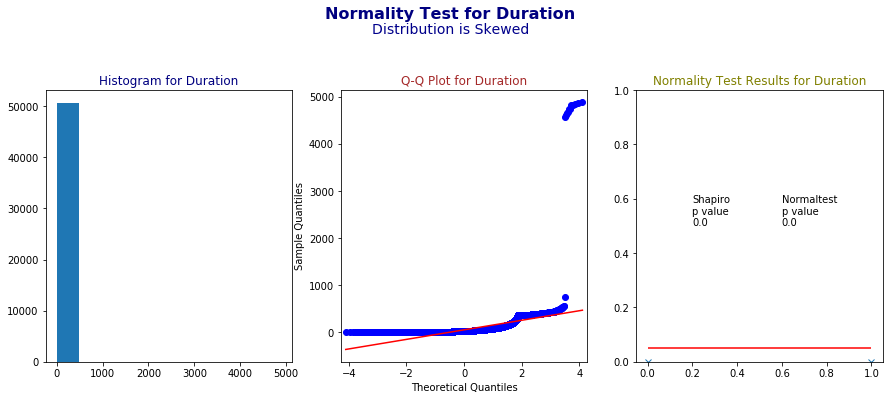

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


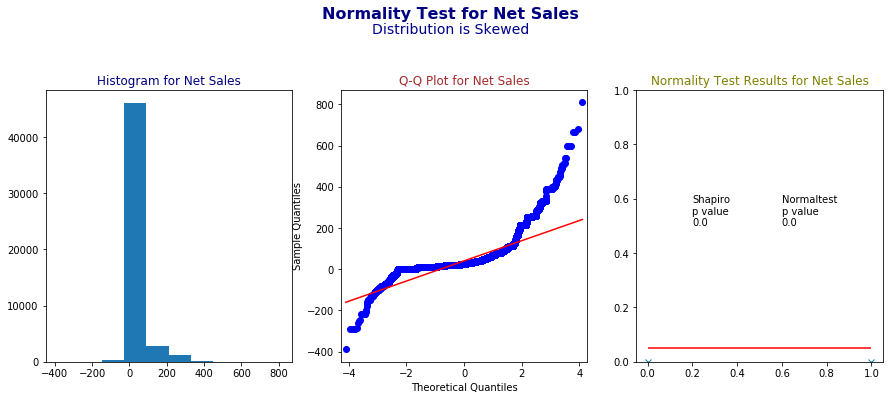

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


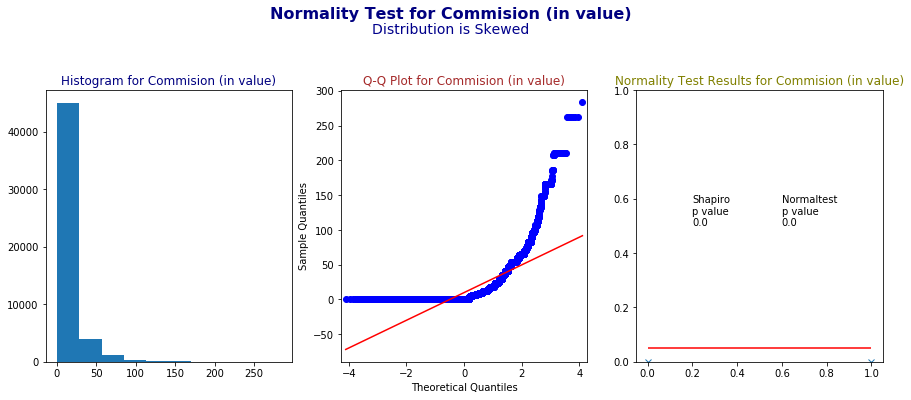

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


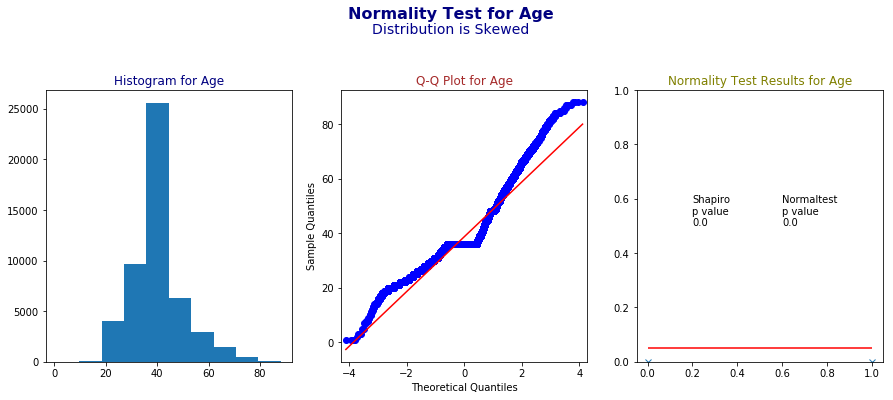

In [73]:
for c in cols:
    normality_plots(df,c)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 12 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null int32
Distribution Channel    50660 non-null int32
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null float64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null float64
dtypes: float64(4), int32(2), int64(2), object(4)
memory usage: 4.3+ MB


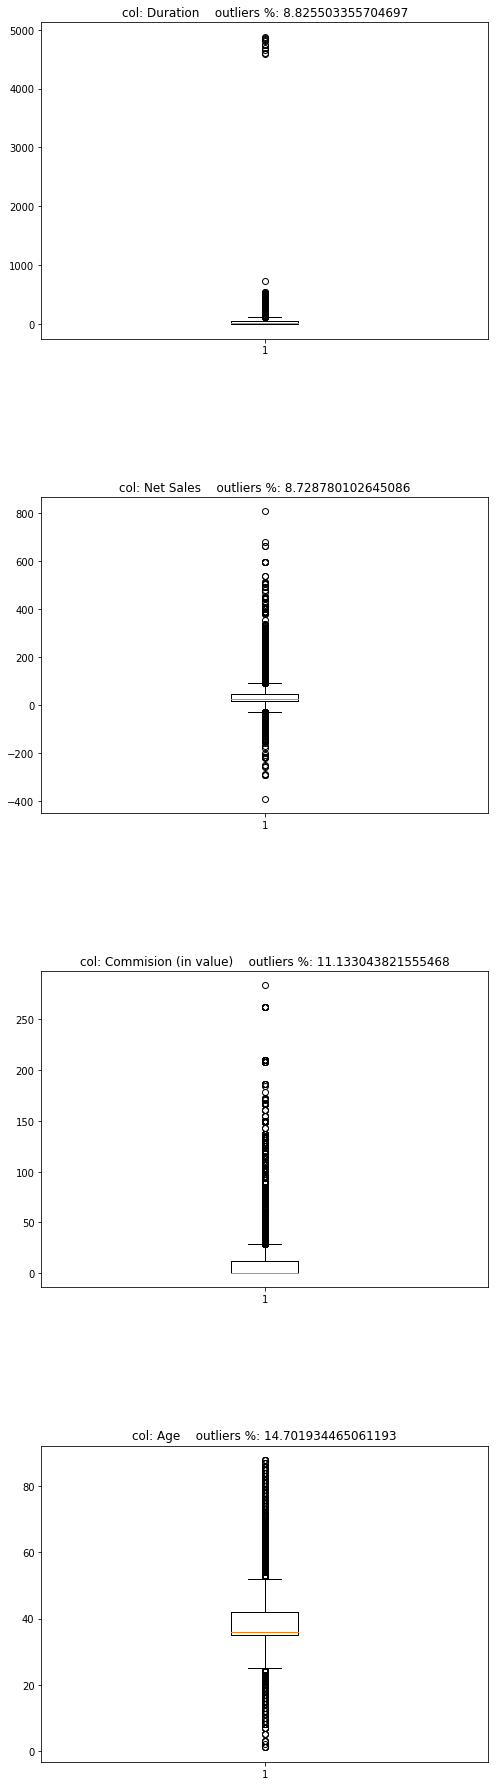

In [75]:
df1 = df[['Duration','Net Sales','Commision (in value)','Age']]
df1.head()
df_boxplot(df1)

In [76]:
df.nunique()

ID                      50660
Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               26
Claim                       2
Duration                  442
Destination               144
Net Sales                1053
Commision (in value)      968
Gender                      2
Age                        86
dtype: int64

In [77]:

df2 = pd.DataFrame(df_test.groupby('Destination')['Net Sales'].count()).reset_index()#-500-810
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df_test,df2, on = 'Destination')
df_test['country_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

# encoding for df
df2 = pd.DataFrame(df.groupby('Destination')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df,df2, on = 'Destination')
df['country_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

In [78]:

df2 = pd.DataFrame(df_test.groupby('Agency')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df_test,df2, on = 'Agency')
df_test['agency_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

# encoding fo df
df2 = pd.DataFrame(df.groupby('Agency')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df,df2, on = 'Agency')
df['agency_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

In [79]:
df2 = pd.DataFrame(df_test.groupby('Product Name')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df_test,df2, on = 'Product Name')
df_test['product_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

# encoding for df
df2 = pd.DataFrame(df.groupby('Product Name')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df,df2, on = 'Product Name')
df['product_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 15 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null int32
Distribution Channel    50660 non-null int32
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null float64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null float64
country_bin             50660 non-null object
agency_bin              50660 non-null object
product_bin             50660 non-null object
dtypes: float64(4), int32(2), int64(2), object(7)
memory usage: 5.4+ MB


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12666 entries, 0 to 12665
Data columns (total 14 columns):
ID                      12666 non-null int64
Agency                  12666 non-null object
Agency Type             12666 non-null int32
Distribution Channel    12666 non-null int32
Product Name            12666 non-null object
Duration                12666 non-null float64
Destination             12666 non-null object
Net Sales               12666 non-null float64
Commision (in value)    12666 non-null float64
Gender                  3605 non-null object
Age                     12666 non-null float64
country_bin             12666 non-null object
agency_bin              12666 non-null object
product_bin             12666 non-null object
dtypes: float64(4), int32(2), int64(1), object(7)
memory usage: 1.3+ MB


In [84]:

df_test=df_test[['agency_bin','product_bin','country_bin','Agency Type','Distribution Channel','Duration','Net Sales','Commision (in value)','Age','Gender']]
df=df[['agency_bin','product_bin','country_bin','Agency Type','Distribution Channel','Claim','Duration','Net Sales','Commision (in value)','Age','Gender']]

In [85]:
df.head()

,agency_bin,product_bin,country_bin,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age,Gender
0,> 500,> 500,> 500,1,1,0,7.0,0.0,17.82,31.0,NaN
1,> 500,> 500,> 500,1,1,0,85.0,69.0,0.00,36.0,NaN
2,> 500,> 500,> 500,1,1,0,11.0,19.8,11.88,75.0,NaN
3,> 500,> 500,> 500,1,1,0,16.0,20.0,0.00,32.0,NaN
4,> 500,> 500,> 500,1,1,0,10.0,15.0,0.00,29.0,NaN


In [86]:
ag_dummies = pd.get_dummies(df_test.agency_bin)
ag_dummies.columns = ['agency_> 500','agency_Between 0 and 250']
df_test = pd.concat([df_test, ag_dummies], axis=1)
# encoding for df
ag_dummies = pd.get_dummies(df.agency_bin)
ag_dummies.columns = ['agency_> 500','agency_Between 0 and 250','agency_Between 250 and 500']
df = pd.concat([df, ag_dummies], axis=1)

In [87]:
ag_dummies = pd.get_dummies(df_test.product_bin)
ag_dummies.columns = ['product_> 500','product_Between 0 and 250','product_Between 250 and 500']
df_test = pd.concat([df_test, ag_dummies], axis=1)
# encoding for df
ag_dummies = pd.get_dummies(df.product_bin)
ag_dummies.columns = ['product_> 500','product_Between 0 and 250','product_Between 250 and 500']
df = pd.concat([df, ag_dummies], axis=1)

In [88]:
df_test.isnull().sum()

agency_bin                        0
product_bin                       0
country_bin                       0
Agency Type                       0
Distribution Channel              0
Duration                          0
Net Sales                         0
Commision (in value)              0
Age                               0
Gender                         9061
agency_> 500                      0
agency_Between 0 and 250          0
product_> 500                     0
product_Between 0 and 250         0
product_Between 250 and 500       0
dtype: int64

In [89]:
ag_dummies = pd.get_dummies(df_test.country_bin)
ag_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12666 entries, 0 to 12665
Data columns (total 3 columns):
> 500                  12666 non-null uint8
Between 0 and 250      12666 non-null uint8
Between 250 and 500    12666 non-null uint8
dtypes: uint8(3)
memory usage: 37.2 KB


In [90]:
ag_dummies = pd.get_dummies(df_test.country_bin)
ag_dummies.columns = ['country_> 500','country_Between 0 and 250','country_Between 250 and 500']
df_test = pd.concat([df_test, ag_dummies], axis=1)
# encoding for df
ag_dummies = pd.get_dummies(df.country_bin)
ag_dummies.columns = ['country_> 500','country_Between 0 and 250','country_Between 250 and 500']
df = pd.concat([df, ag_dummies], axis=1)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 20 columns):
agency_bin                     50660 non-null object
product_bin                    50660 non-null object
country_bin                    50660 non-null object
Agency Type                    50660 non-null int32
Distribution Channel           50660 non-null int32
Claim                          50660 non-null int64
Duration                       50660 non-null float64
Net Sales                      50660 non-null float64
Commision (in value)           50660 non-null float64
Age                            50660 non-null float64
Gender                         14614 non-null object
agency_> 500                   50660 non-null uint8
agency_Between 0 and 250       50660 non-null uint8
agency_Between 250 and 500     50660 non-null uint8
product_> 500                  50660 non-null uint8
product_Between 0 and 250      50660 non-null uint8
product_Between 250 and 500    50660 non-null u

In [92]:
df_test.head()

,agency_bin,product_bin,country_bin,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Gender,agency_> 500,agency_Between 0 and 250,product_> 500,product_Between 0 and 250,product_Between 250 and 500,country_> 500,country_Between 0 and 250,country_Between 250 and 500
0,> 500,> 500,Between 0 and 250,1,1,58.0,49.5,29.7,47.0,NaN,1,0,1,0,0,0,1,0
1,> 500,> 500,Between 0 and 250,1,1,4.0,20.0,0.0,24.0,NaN,1,0,1,0,0,0,1,0
2,> 500,> 500,Between 0 and 250,1,1,68.0,20.0,0.0,36.0,NaN,1,0,1,0,0,0,1,0
3,> 500,> 500,Between 0 and 250,1,1,41.0,28.0,0.0,36.0,NaN,1,0,1,0,0,0,1,0
4,> 500,> 500,Between 0 and 250,1,1,16.0,11.0,0.0,36.0,NaN,1,0,1,0,0,0,1,0


In [93]:

df_test['Gender'] = df_test['Gender'].fillna(method='backfill')
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].mode()[0])
# Dropping Gender column

df['Gender'] = df['Gender'].fillna(method='backfill')
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [94]:
df_test.drop(columns = ['agency_bin','product_bin','country_bin'],axis=1,inplace=True)
df.drop(columns = ['agency_bin','product_bin','country_bin'],axis=1,inplace=True)

In [95]:
df.head()

,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age,Gender,agency_> 500,agency_Between 0 and 250,agency_Between 250 and 500,product_> 500,product_Between 0 and 250,product_Between 250 and 500,country_> 500,country_Between 0 and 250,country_Between 250 and 500
0,1,1,0,7.0,0.0,17.82,31.0,F,1,0,0,1,0,0,1,0,0
1,1,1,0,85.0,69.0,0.00,36.0,F,1,0,0,1,0,0,1,0,0
2,1,1,0,11.0,19.8,11.88,75.0,F,1,0,0,1,0,0,1,0,0
3,1,1,0,16.0,20.0,0.00,32.0,F,1,0,0,1,0,0,1,0,0
4,1,1,0,10.0,15.0,0.00,29.0,F,1,0,0,1,0,0,1,0,0


In [96]:
df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [127]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [128]:
X = df
y = df['Claim']
  
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X, y, train_size=0.7, random_state=7)

print(len(X_train_SMOTE))
print(len(y_train_SMOTE))
print(len(X_test_SMOTE))
print(len(y_test_SMOTE))

smote = SMOTE(random_state=2)
X_ov, y_ov = smote.fit_resample(X_train_SMOTE, y_train_SMOTE)
X_ov = pd.DataFrame(X_ov) 
X_ov.columns = df.columns
X_ov.drop('Claim', axis=1 ,inplace=True)
print(len(X_ov))
print(len(y_ov))


35462
35462
15198
15198
69918
69918


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [129]:
len(X_ov.columns)

16

In [131]:
#Random Forest
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_ov,y_ov)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [132]:
X_ov.columns

Index(['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500'],
      dtype='object')

In [133]:
len(df_test.columns)

16

In [134]:
df_test['agency_Between 250 and 500'] = 0

In [135]:
df_test = df_test[['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500']]

In [137]:
X_test_SMOTE = X_test_SMOTE[['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500']]

In [138]:
y_predict = clf.predict(X_test_SMOTE)
y_predict_real = clf.predict(df_test)

In [139]:
df4 = pd.DataFrame(y_predict)
df4[0].unique()

array([0, 1], dtype=int64)

In [140]:
df5 = pd.DataFrame(y_predict_real)
df5[0].unique()

array([0, 1], dtype=int64)

In [141]:
print(classification_report(y_test_SMOTE,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14959
           1       0.05      0.04      0.04       239

   micro avg       0.97      0.97      0.97     15198
   macro avg       0.52      0.51      0.51     15198
weighted avg       0.97      0.97      0.97     15198



In [143]:
df_test_new = pd.read_csv(raw_data_path_test)

In [144]:
df5.reset_index(inplace = True)

In [149]:
df5.columns = ['index','Claim']

In [151]:
df5.head()

,index,Claim
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [148]:
df_test_new = df_test_new['ID']
df_test_new.reset_index()

,index,ID
0,0,25902
1,1,19535
2,2,43717
3,3,48271
4,4,52318
5,5,31820
6,6,5943
7,7,45799
8,8,4666
9,9,10884


In [153]:
df_test_new = pd.DataFrame(df_test_new)

In [156]:
df_test_new=df_test_new.reset_index()

In [157]:
df6 = pd.merge(df5,df_test_new, on ='index')

In [159]:
df6.drop('index',axis=1,inplace=True)

In [161]:
df6.to_csv('submission_1.csv')

In [ ]:
---import seaborn as sns; sns.set(style="ticks", color_codes=True)
g =sns.pairplot(df)

In [ ]:
def regression_residual_plots(model_fit, dependent_var, data, size = [10,10]):
    """
    This function requires:
        import matplotlib.pyplot as plt
        import statsmodels.api as sm
    
    Arguments:
    model_fit: It takes a fitted model as input.
        Obtainable through Statsmodels regression: 
            model_fit = sm.OLS(endog= DEPENDENT VARIABLE, exog= INDEPENDENT VARIABLE).fit()
    dependent_var: string of the pandas column used as the model dependent variable.
    data: pandas dataset where the dependent variable is located. The model data.
    size: default [10,10]. Updates the [width, height], inputed in matplotlibs figsize = [10,10]
        
    Ive only run it on simple, non-robust, ordinary least squares models,
    but these metrics are standard for linear models.
    """
    
    # Extract relevant regression output for plotting
    # fitted values (need a constant term for intercept)
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]
    ########################################################################
    # Plot Size
    fig = plt.figure(figsize=size)
    
    # Residual vs. Fitted
    ax = fig.add_subplot(2, 2, 1) # Top Left
    sns.residplot(model_fitted_y, dependent_var, data=data, 
                              lowess=True, 
                              scatter_kws={'alpha': 0.5}, 
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
                 ax=ax)
    ax.set_title('Residuals vs Fitted')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    # Annotations of Outliers
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        ax.annotate(i, xy=(model_fitted_y[i], model_residuals[i]));
    ########################################################################
    # Normal Q-Q
    ax = fig.add_subplot(2, 2, 2) # Top Right
    QQ = sm.ProbPlot(model_norm_residuals)
    QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax)
    ax.set_title('Normal Q-Q')
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Standardized Residuals')
    # Annotations of Outliers
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        ax.annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                model_norm_residuals[i]));
    ########################################################################
    # Scale-Location Plot
    ax = fig.add_subplot(2, 2, 3) # Bottom Left
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax)
    ax.set_title('Scale-Location')
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('$\sqrt{|Standardized Residuals|}$');
    # Annotations of Outliers
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        ax.annotate(i, 
                                   xy=(model_fitted_y[i], 
                                       model_norm_residuals_abs_sqrt[i]));
    ########################################################################  
    # Cook's Distance Plot
    ax = fig.add_subplot(2, 2, 4) # Bottom Right
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(model_leverage, model_norm_residuals, 
                scatter=False, 
                ci=False, 
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
               ax=ax)
    ax.set_xlim(0, 0.20)
    ax.set_ylim(-3, 5)
    ax.set_title('Residuals vs Leverage')
    ax.set_xlabel('Leverage')
    ax.set_ylabel('Standardized Residuals')
    # Annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        ax.annotate(i, xy=(model_leverage[i],model_norm_residuals[i]))
    # Shenanigans for Cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')
    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
          np.linspace(0.001, 0.200, 50)) # 1 line
    plt.legend(loc='upper right')
    plt.savefig('residual_plots.png',bbox_inches='tight')
    plt.show()
print("Residual Plots Function Ready")